Top features predicting 'Fatal' crashes:
1. cat__Presence and type of median or divider_3 — importance: 0.1771
2. cat__Presence of guardrails_2 — importance: 0.1502
3. cat__Lane markings and signage visibility_3 — importance: 0.0890
4. cat__Pavement condition_4 — importance: 0.0801
5. cat__Presence of guardrails_1 — importance: 0.0742
6. cat__Urban vs. rural environment_1 — importance: 0.0700
7. cat__Posted speed limit_4 — importance: 0.0665
8. cat__Lane markings and signage visibility_2 — importance: 0.0582
9. cat__Pavement condition_3 — importance: 0.0571
10. cat__Cable barriers_1 — importance: 0.0428


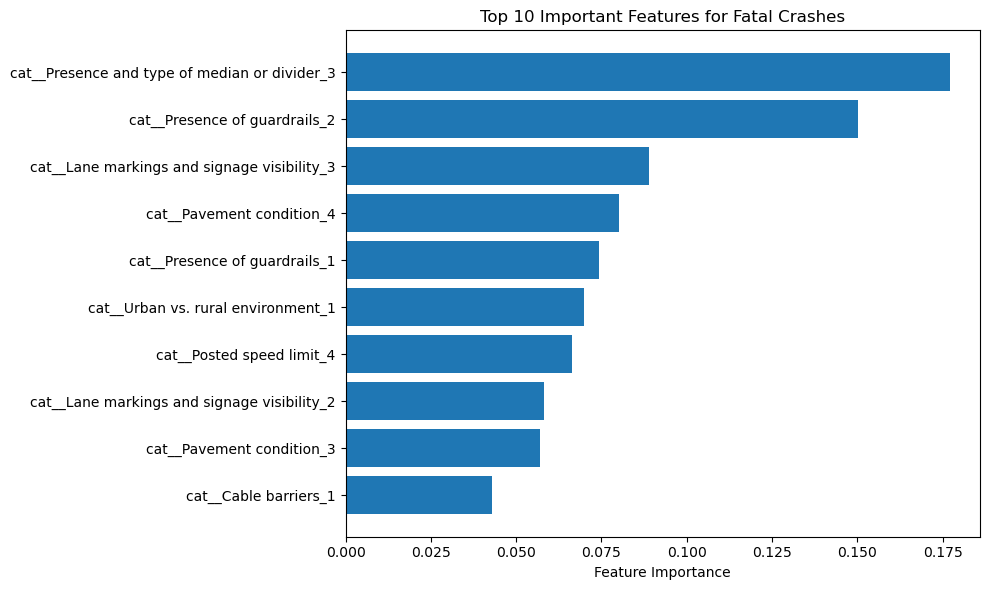

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("../datasets/ALL_I40_crash_data_final.csv")


# Drop rows with missing Crash Type
df = df.dropna(subset=["Crash Type"])

# Create binary target: 1 if "Injury", 0 otherwise
df["Fatal"] = df["Crash Type"].apply(lambda x: 1 if "Fatal" in x else 0)

# Define features to use
features = [
    "Pavement condition",
    "Nighttime lighting and visibility",
    "Posted speed limit",
    "Urban vs. rural environment",
    "Surrounding natural features",
    "Presence of guardrails",
    "Cable barriers",
    "Shoulder type and width",
    "Lane markings and signage visibility",
    "Presence and type of median or divider"
]

X = df[features]
y = df["Fatal"]

# Identify categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

# One-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_cols)
    ],
    remainder="passthrough"
)

# Encode features
X_encoded = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=40)

# Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=40)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Display top features
print("Top features predicting 'Fatal' crashes:")
for i in range(10):
    print(f"{i+1}. {feature_names[indices[i]]} — importance: {importances[indices[i]]:.4f}")

# Plot top features
plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features for Fatal Crashes")
plt.barh(range(10), importances[indices[:10]][::-1], align='center')
plt.yticks(range(10), [feature_names[i] for i in indices[:10]][::-1])
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()